## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.7]

In [7]:
results = {}
for dr_exp in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dr_exp)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    key_name = 'lr:%s'%(dr_exp)
    results[key_name]={}
    results[key_name]['train_loss']=train_loss
    results[key_name]['valid_loss']=valid_loss
    results[key_name]['train_acc']=train_acc
    results[key_name]['valid_acc']=valid_acc

W0327 16:12:38.419399 140011031734080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 1s 20us/step - loss: 1.3797 - acc: 0.5078 - val_loss: 1.3566 - val_acc: 0.5096
Epoch 49/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.3733 - acc: 0.5075 - val_loss: 1.3556 - val_acc: 0.5118
Epoch 50/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.3673 - acc: 0.5123 - val_loss: 1.3600 - val_acc: 0.5122
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____

50000/50000 [==============================] - 1s 20us/step - loss: 1.8194 - acc: 0.3171 - val_loss: 1.7162 - val_acc: 0.3650
Epoch 46/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.8164 - acc: 0.3203 - val_loss: 1.6960 - val_acc: 0.3780
Epoch 47/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.8096 - acc: 0.3255 - val_loss: 1.7059 - val_acc: 0.3744
Epoch 48/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.8130 - acc: 0.3257 - val_loss: 1.6980 - val_acc: 0.3721
Epoch 49/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8087 - acc: 0.3245 - val_loss: 1.6947 - val_acc: 0.3799
Epoch 50/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.8030 - acc: 0.3295 - val_loss: 1.6970 - val_acc: 0.3841
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)           

50000/50000 [==============================] - 1s 26us/step - loss: 2.0952 - acc: 0.1738 - val_loss: 2.2920 - val_acc: 0.1076
Epoch 43/50
50000/50000 [==============================] - 1s 21us/step - loss: 2.0956 - acc: 0.1728 - val_loss: 2.2728 - val_acc: 0.1098
Epoch 44/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.0919 - acc: 0.1733 - val_loss: 2.2763 - val_acc: 0.1129
Epoch 45/50
50000/50000 [==============================] - 1s 22us/step - loss: 2.0894 - acc: 0.1748 - val_loss: 2.2605 - val_acc: 0.1086
Epoch 46/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.0941 - acc: 0.1749 - val_loss: 2.2568 - val_acc: 0.1105
Epoch 47/50
50000/50000 [==============================] - 1s 21us/step - loss: 2.0949 - acc: 0.1736 - val_loss: 2.2788 - val_acc: 0.1096
Epoch 48/50
50000/50000 [==============================] - 1s 20us/step - loss: 2.0901 - acc: 0.1715 - val_loss: 2.2865 - val_acc: 0.1094
Epoch 49/50
50000/50000 [=====================

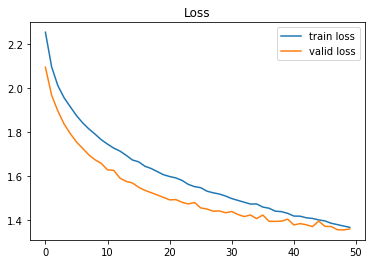

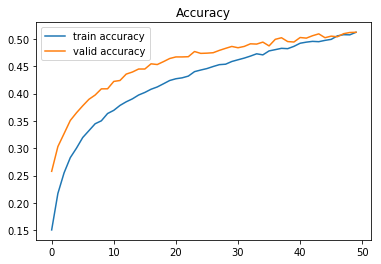

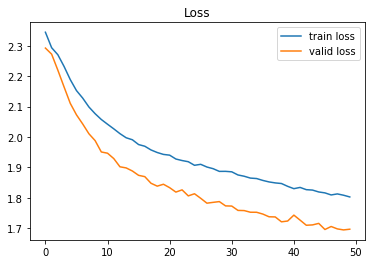

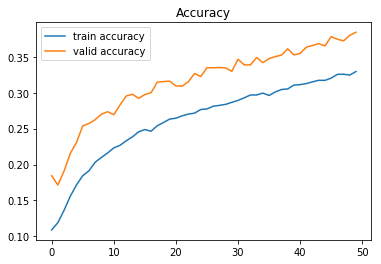

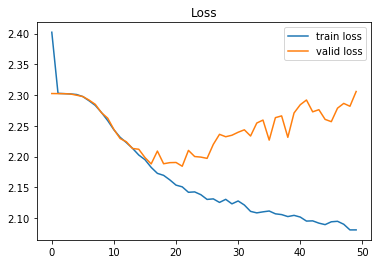

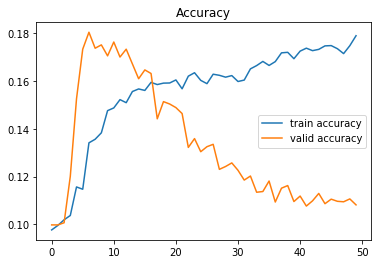

In [9]:

import matplotlib.pyplot as plt
%matplotlib inline
for lr_result_dict in results:
    train_loss = results[lr_result_dict]['train_loss']
    valid_loss = results[lr_result_dict]['valid_loss']
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    train_acc = results[lr_result_dict]['train_acc']
    valid_acc = results[lr_result_dict]['valid_acc']
    
    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()